In [48]:
import pandas as pd

In [49]:
agri_gdp_data = pd.read_csv('./agri_gdp_data.csv')
agri_gdp_data = agri_gdp_data.drop(columns='Unnamed: 0')


Train test split

In [50]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
agri_gdp_data.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'Code', 'gdp'],
      dtype='object')

In [52]:
agri_gdp_tr = agri_gdp_data.copy()
agri_gdp_tr.head()
agri_gdp_data = agri_gdp_tr.drop("total_emission", axis=1)
agri_gdp_labels = agri_gdp_tr["total_emission"].copy()

X_train, X_test, y_train, y_test = train_test_split(agri_gdp_data, agri_gdp_labels, test_size=0.2)

pipeline

In [53]:
imputer = SimpleImputer(strategy="most_frequent")
std_scaler = StandardScaler()

num_pipeline = Pipeline([
    ("imputer", imputer),
    ("std_scaler", std_scaler)
])
num_col = agri_gdp_data.select_dtypes(['number']).columns

# converting categorical data
cat_encoder = OneHotEncoder(handle_unknown="ignore")
cat_col = agri_gdp_data.select_dtypes(['object']).columns

# full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_col),
    ("cat", cat_encoder, cat_col)
])

In [54]:
training_prepared = full_pipeline.fit_transform(X_train)
test_prepared = full_pipeline.transform(X_test) # do we put this through the pipeline i forget

regression & error

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_mse_rmse(predictions, labels):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

In [56]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(training_prepared, y_train)

lin_pred = lin_reg.predict(training_prepared)

lin_mse, lin_rmse = calculate_mse_rmse(lin_pred, y_train)
print("training mse: ", lin_mse)
print("training rmse: ", lin_rmse)

lin_test_pred = lin_reg.predict(test_prepared)

lin_mse, lin_rmse = calculate_mse_rmse(lin_test_pred, y_test)
print("test mse: ", lin_mse)
print("test rmse: ", lin_rmse)

training mse:  19.70784462282344
training rmse:  4.439351824627492
test mse:  24.78572194214318
test rmse:  4.9785260812958665


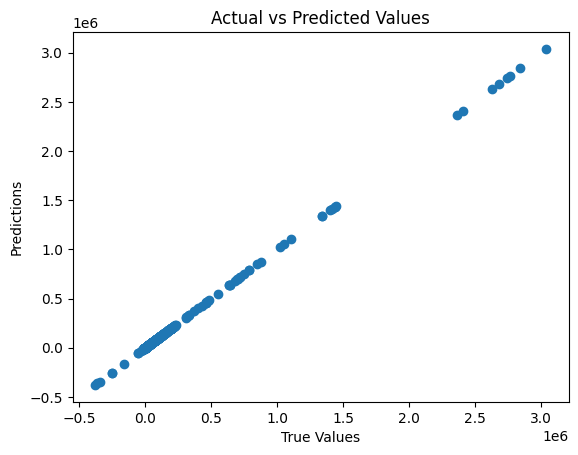

In [57]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lin_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values")
plt.show()

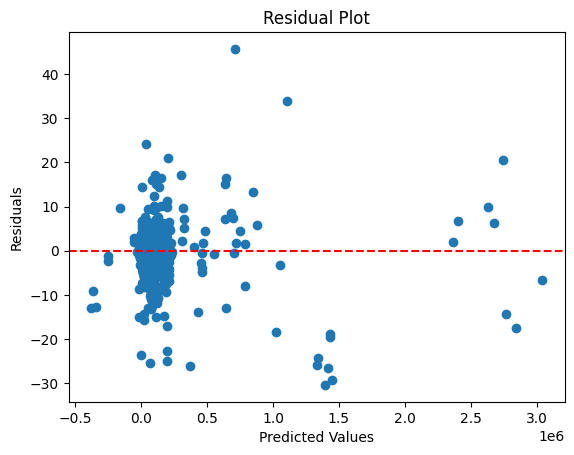

In [58]:
residuals = y_test - lin_test_pred

plt.scatter(lin_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

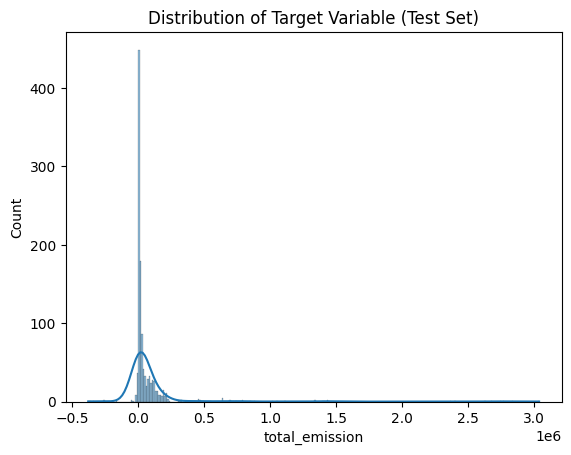

In [59]:
import seaborn as sns
sns.histplot(y_test, kde=True)
plt.title("Distribution of Target Variable (Test Set)")
plt.show()

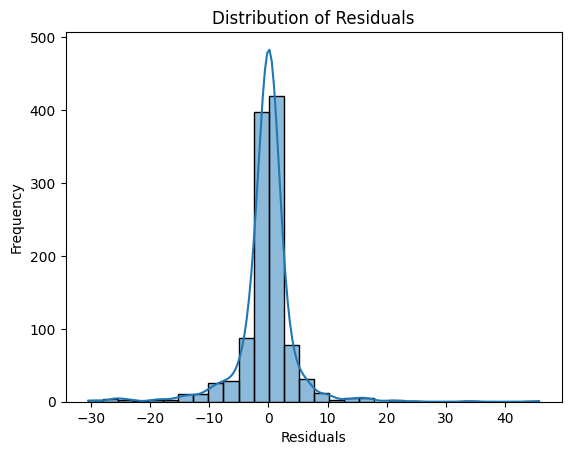

In [60]:
import seaborn as sns

sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

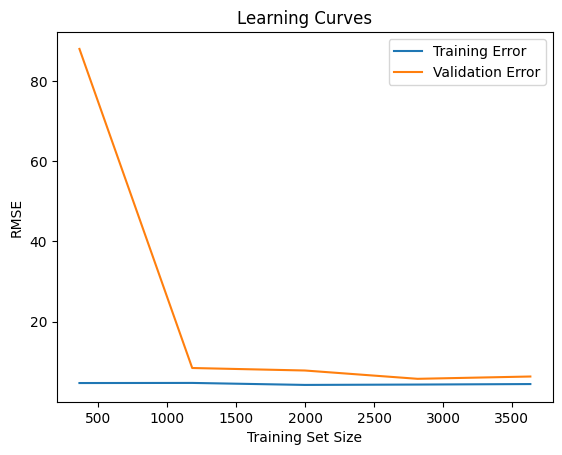

In [61]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, training_prepared, y_train, scoring="neg_mean_squared_error", cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.plot(train_sizes, train_rmse, label="Training Error")
plt.plot(train_sizes, test_rmse, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves")
plt.legend()
plt.show()

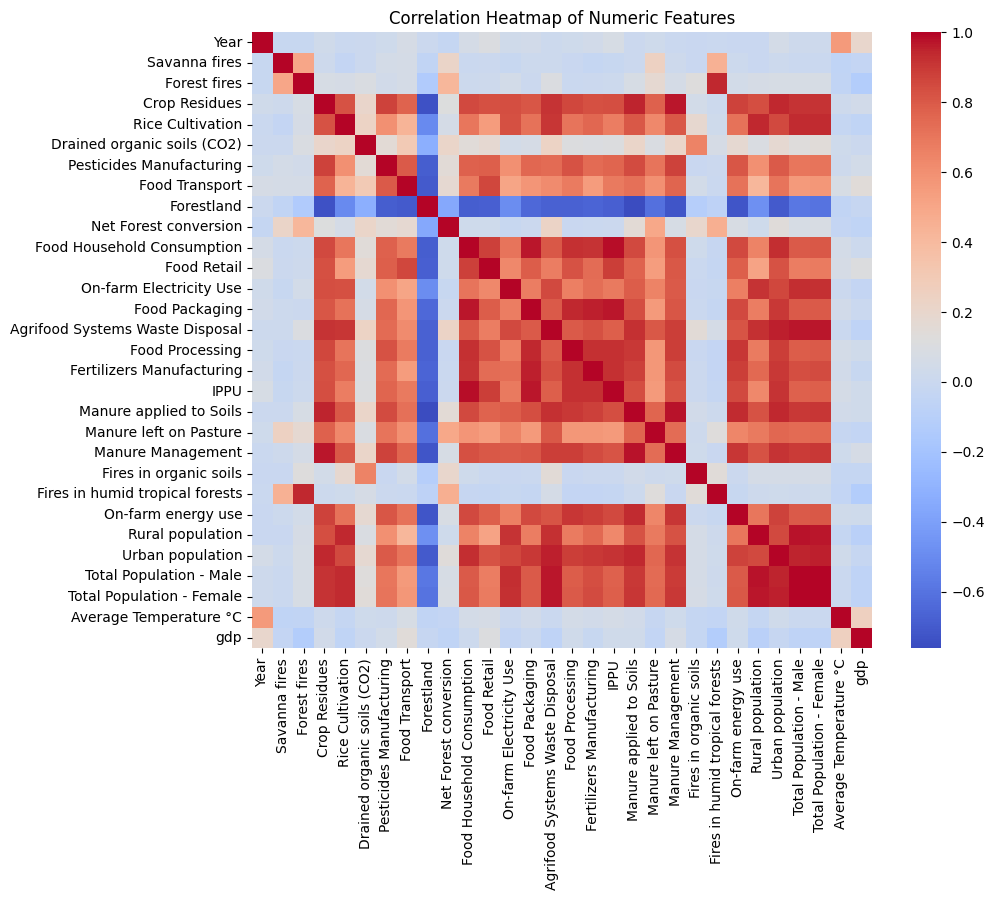

In [62]:
numeric_data = agri_gdp_data[num_col]  # Select only numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [63]:
print(agri_gdp_data.columns)


Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'Average Temperature °C', 'Code', 'gdp'],
      dtype='object')


In [64]:
# Compute absolute differences between actual and predicted values
predicted_with_countries = pd.DataFrame({
    'Area': X_test['Area'].reset_index(drop=True),
    'Actual': y_test.reset_index(drop=True),
    'Predicted': lin_test_pred
})
predicted_with_countries['Difference'] = abs(predicted_with_countries['Actual'] - predicted_with_countries['Predicted'])

# Get the top 10 countries with the biggest differences
top_10_differences = predicted_with_countries.nlargest(10, 'Difference')

print("Top 10 Areas with the Largest Differences (Actual vs Predicted):")
print(top_10_differences)




Top 10 Areas with the Largest Differences (Actual vs Predicted):
            Area        Actual     Predicted  Difference
925        India  7.145917e+05  7.145460e+05   45.699808
567        China  1.107741e+06  1.107707e+06   33.907798
724    Indonesia  1.396587e+06  1.396617e+06   30.410559
620    Indonesia  1.444640e+06  1.444669e+06   29.182933
602       Brazil  1.415655e+06  1.415681e+06   26.633344
227        India  3.694392e+05  3.694653e+05   26.093077
517       Brazil  1.336734e+06  1.336759e+06   25.851122
421  Philippines  6.699776e+04  6.702322e+04   25.458199
681      Myanmar  1.968204e+05  1.968454e+05   25.012373
871       Brazil  1.339927e+06  1.339951e+06   24.354558


Top 3 features most correlated with Predicted Total Emission: Index(['total_emission', 'Urban population',
       'Agrifood Systems Waste Disposal'],
      dtype='object')


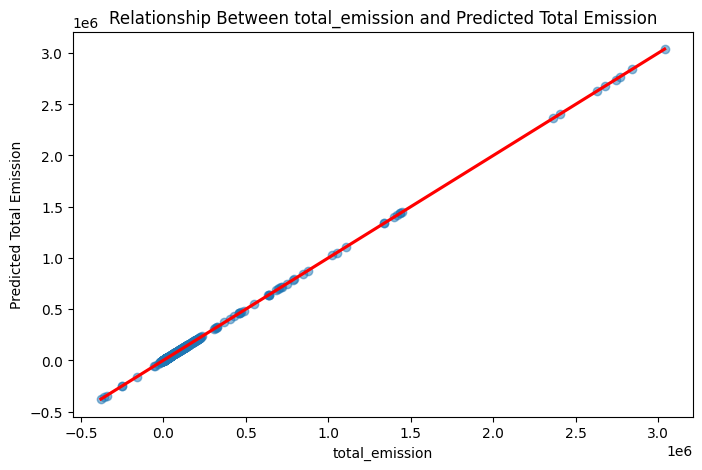

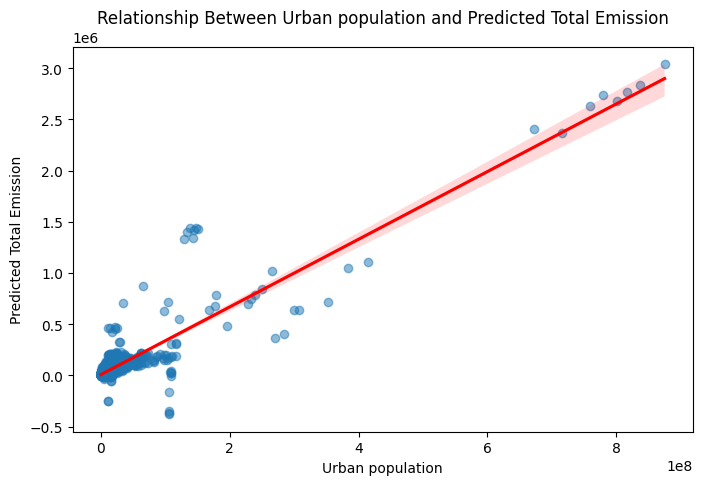

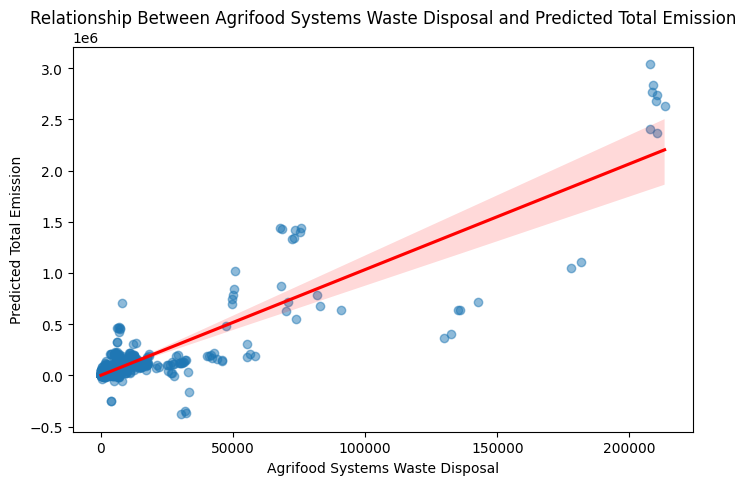

In [65]:
# Add the predicted total emission values to a copy of the test set
agri_gdp_tr.loc[X_test.index, 'predicted_total_emission'] = lin_test_pred

# Select only numerical columns for correlation analysis
numeric_data = agri_gdp_tr.select_dtypes(include=['number'])

# Update correlation analysis to use predicted total emission
correlation_matrix = numeric_data.corr()

# Get the top 3 features most correlated with predicted total emission
top_features = correlation_matrix['predicted_total_emission'].abs().sort_values(ascending=False).index[1:4]  # Skip index 0, which is 'predicted_total_emission' itself
print("Top 3 features most correlated with Predicted Total Emission:", top_features)

# Plot the relationships between the top features and the predicted total emission
for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=agri_gdp_tr, x=feature, y='predicted_total_emission', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f"Relationship Between {feature} and Predicted Total Emission")
    plt.xlabel(feature)
    plt.ylabel("Predicted Total Emission")
    plt.show()


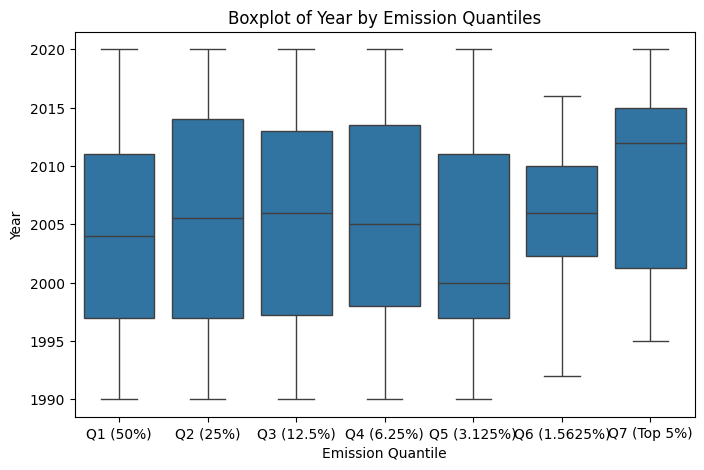

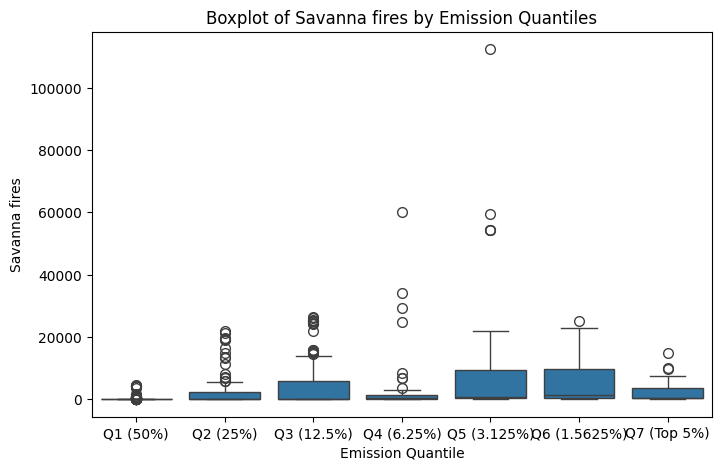

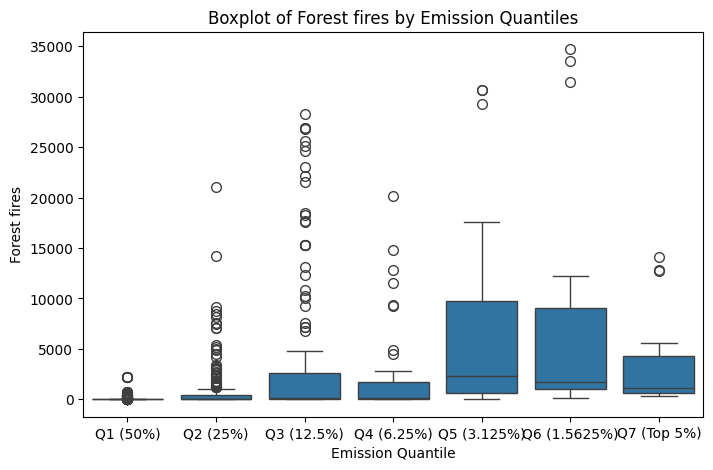

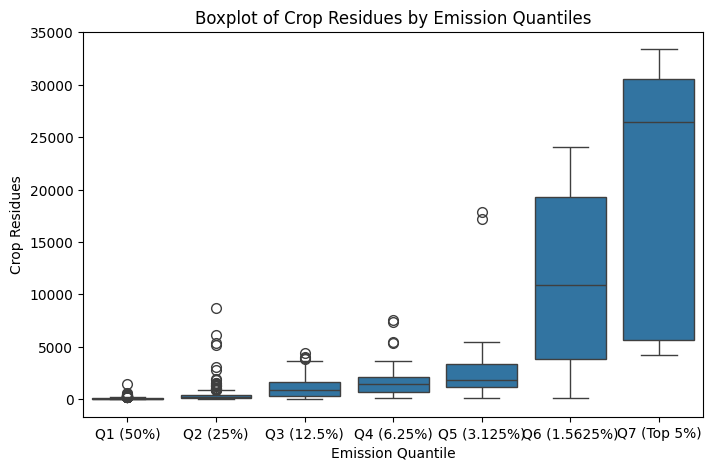

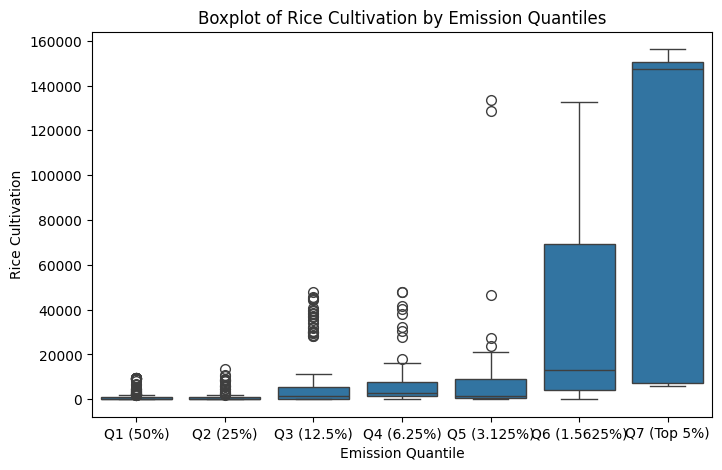

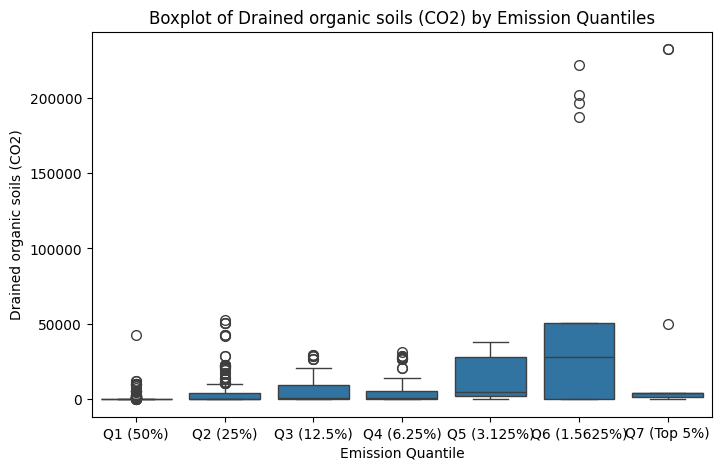

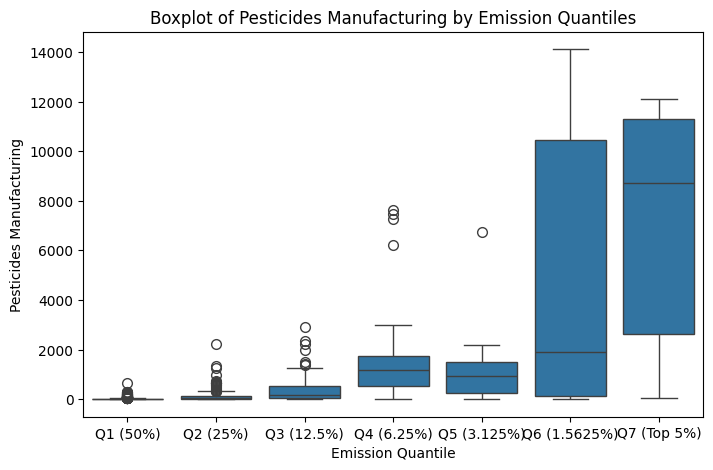

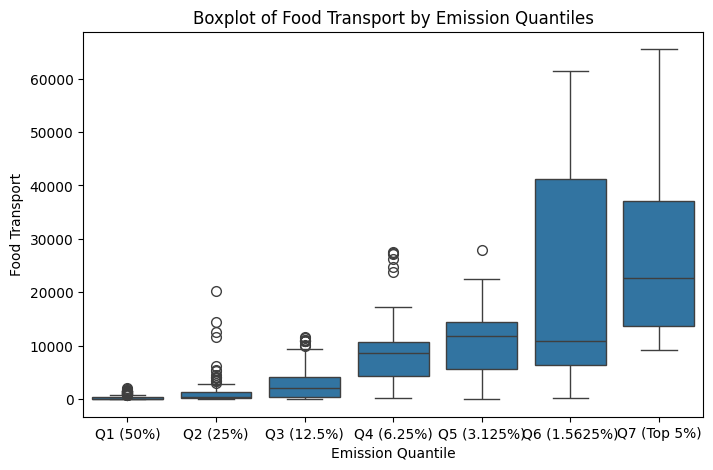

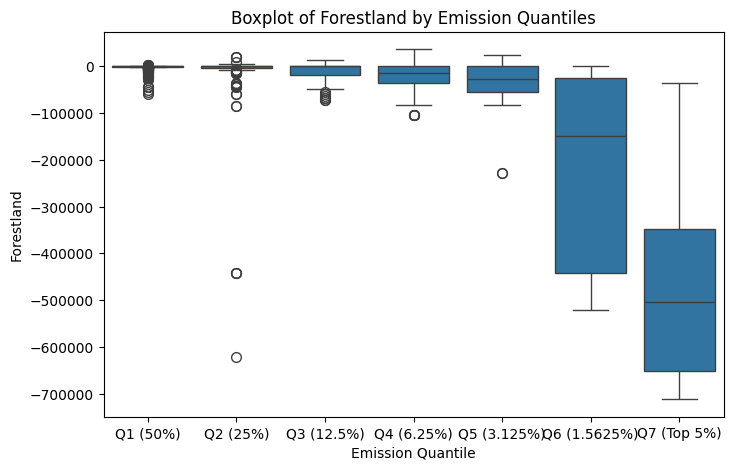

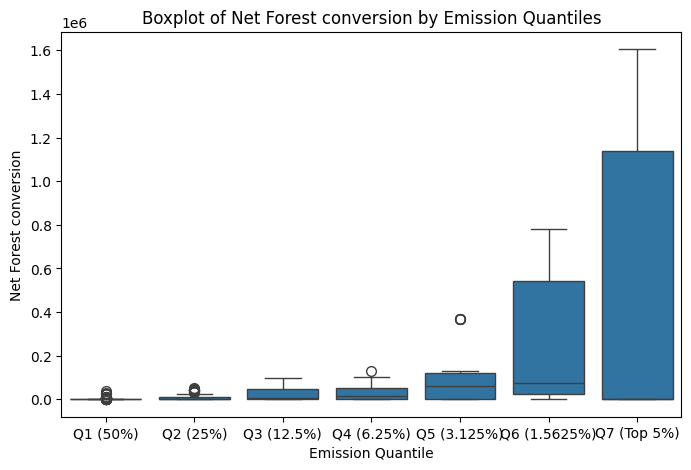

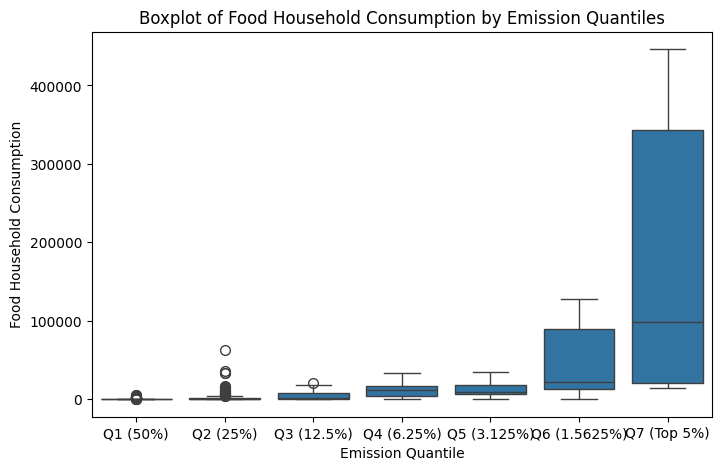

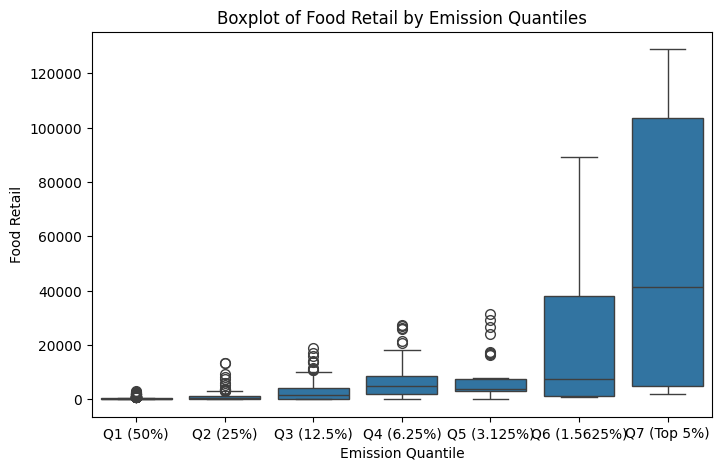

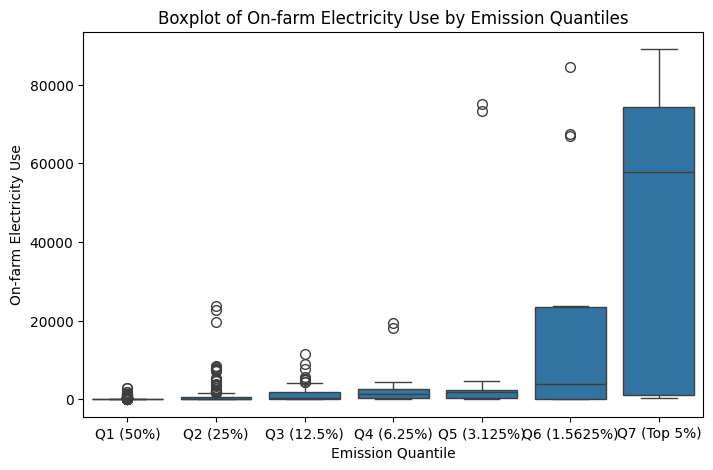

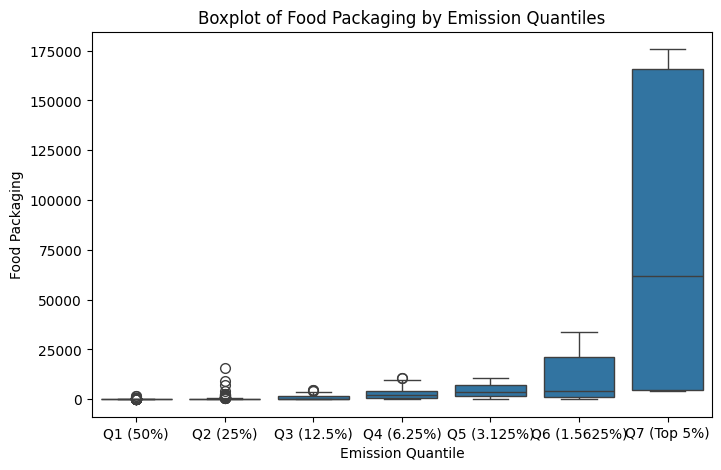

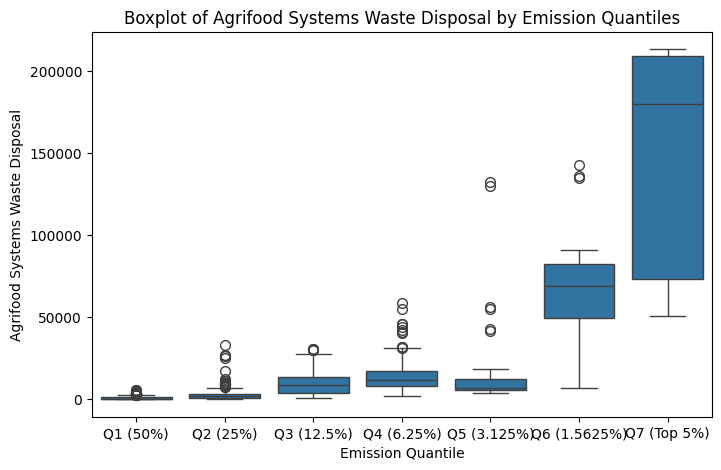

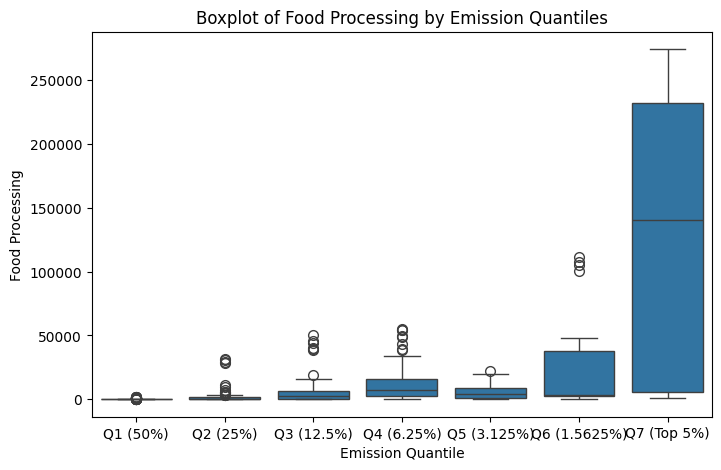

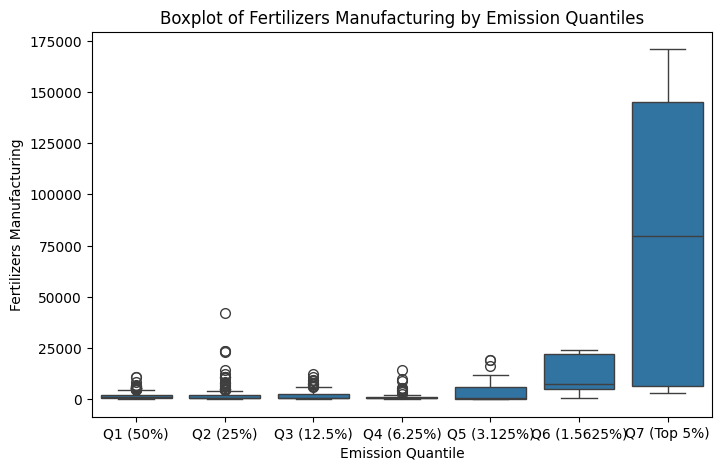

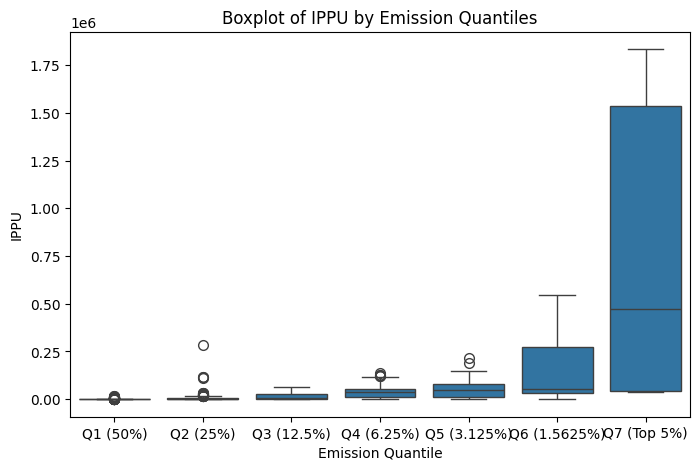

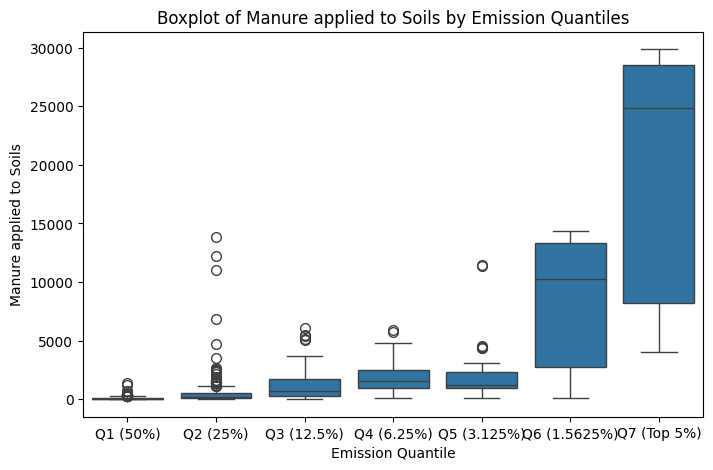

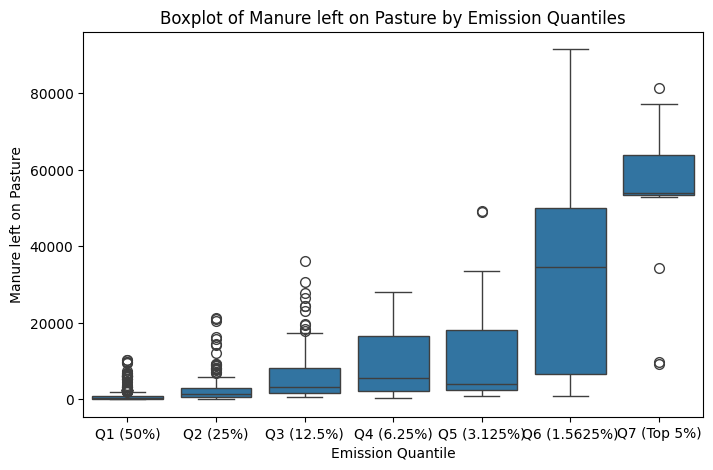

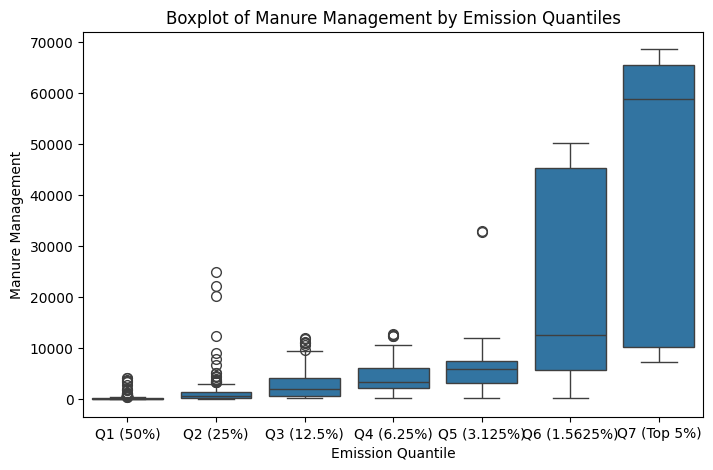

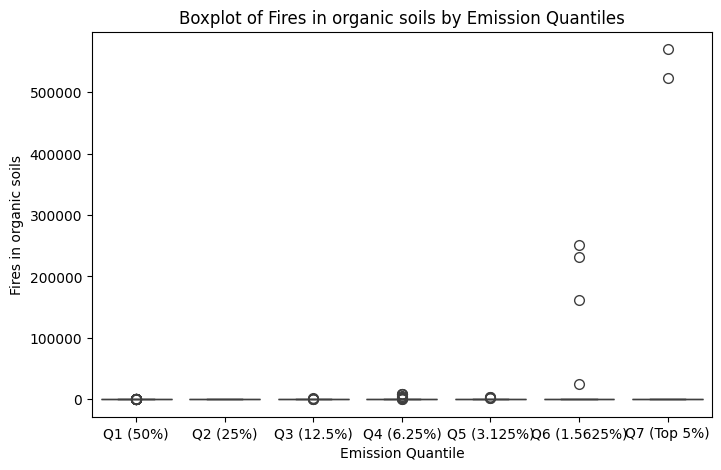

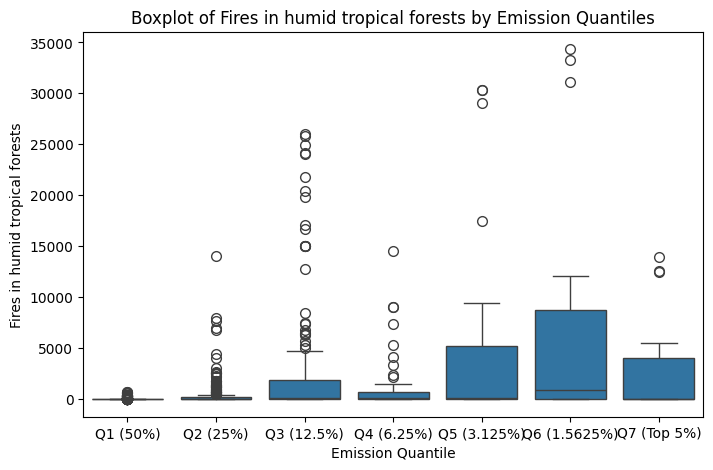

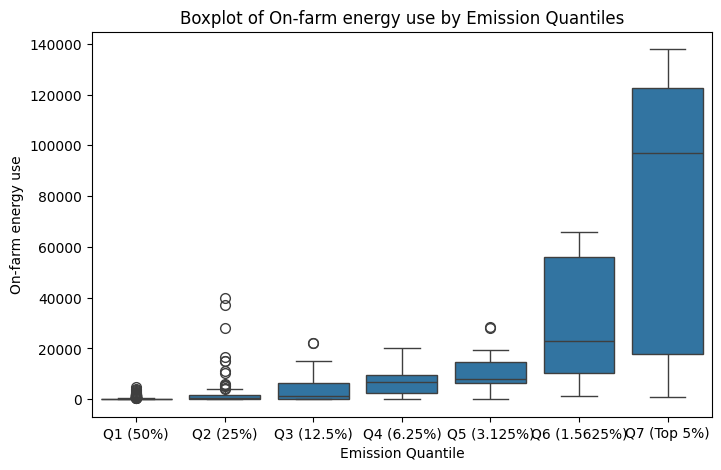

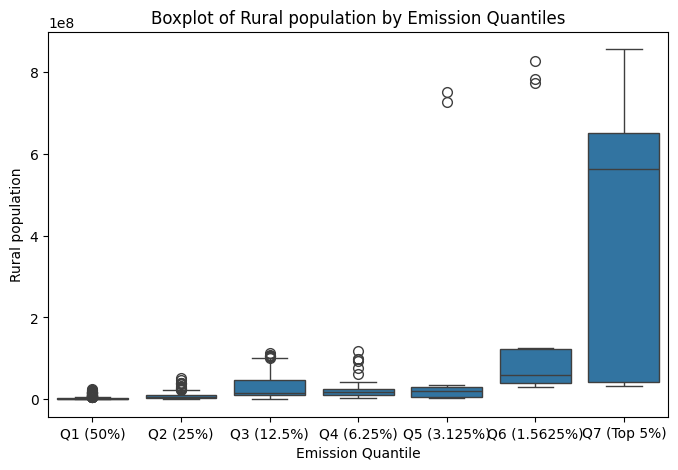

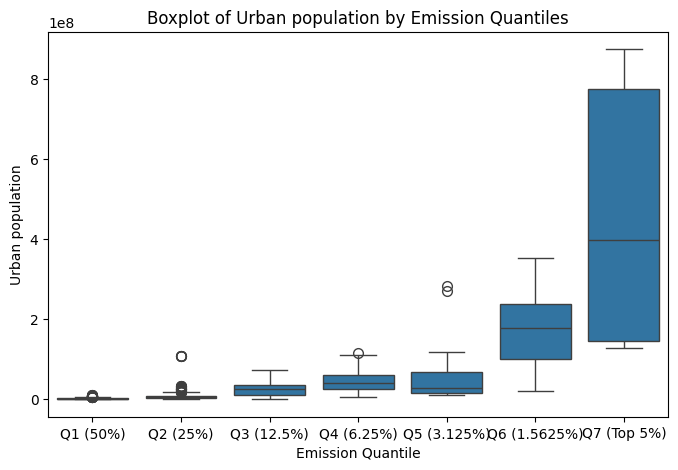

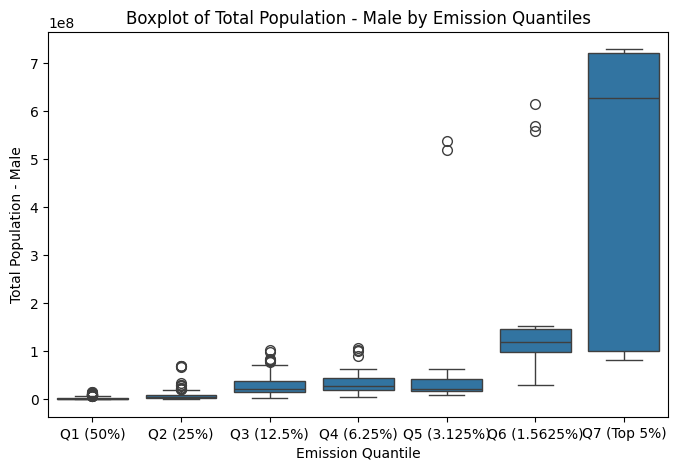

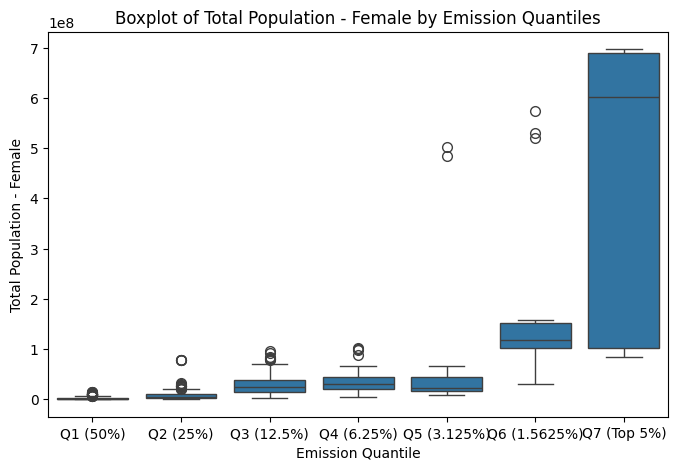

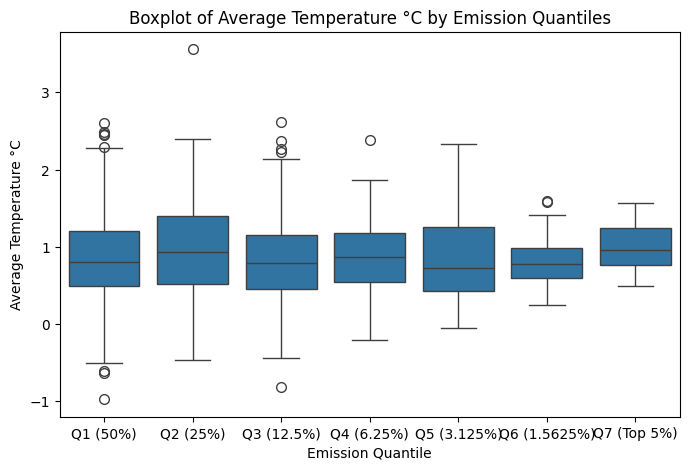

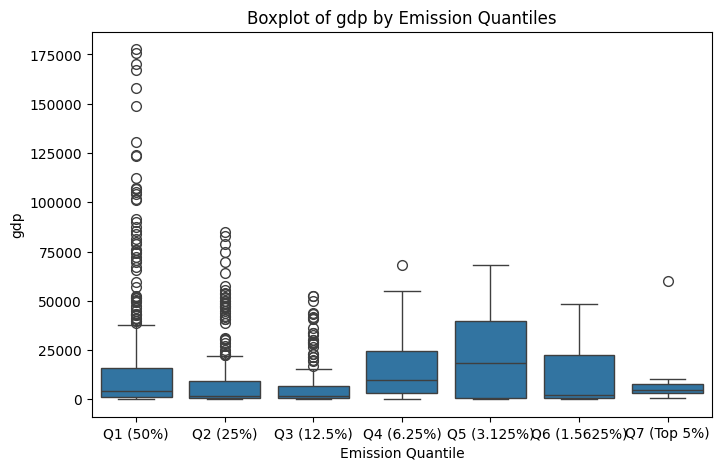

In [66]:
#These plots show the distribution of the column values for the differnt levels of total emission.
#Can be used to see which values have the largest range for differnet amount of emissions.
#Some of the graphs are heavily skewed due to outliers, but that is expected for vlaues such as Fires in Tropical Forests due to how specific it is.

quantiles = [0, 0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 1]
labels = ['Q1 (50%)', 'Q2 (25%)', 'Q3 (12.5%)', 'Q4 (6.25%)', 'Q5 (3.125%)', 'Q6 (1.5625%)', 'Q7 (Top 5%)']
agri_gdp_tr['emission_quantile'] = pd.cut(agri_gdp_tr['predicted_total_emission'], bins=[0] + [agri_gdp_tr['predicted_total_emission'].quantile(q) for q in quantiles[1:]], labels=labels)

for col in num_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=agri_gdp_tr, x='emission_quantile', y=col, fliersize=7, whis=1.5)
    plt.title(f"Boxplot of {col} by Emission Quantiles")
    plt.xlabel("Emission Quantile")
    plt.ylabel(col)
    plt.show()


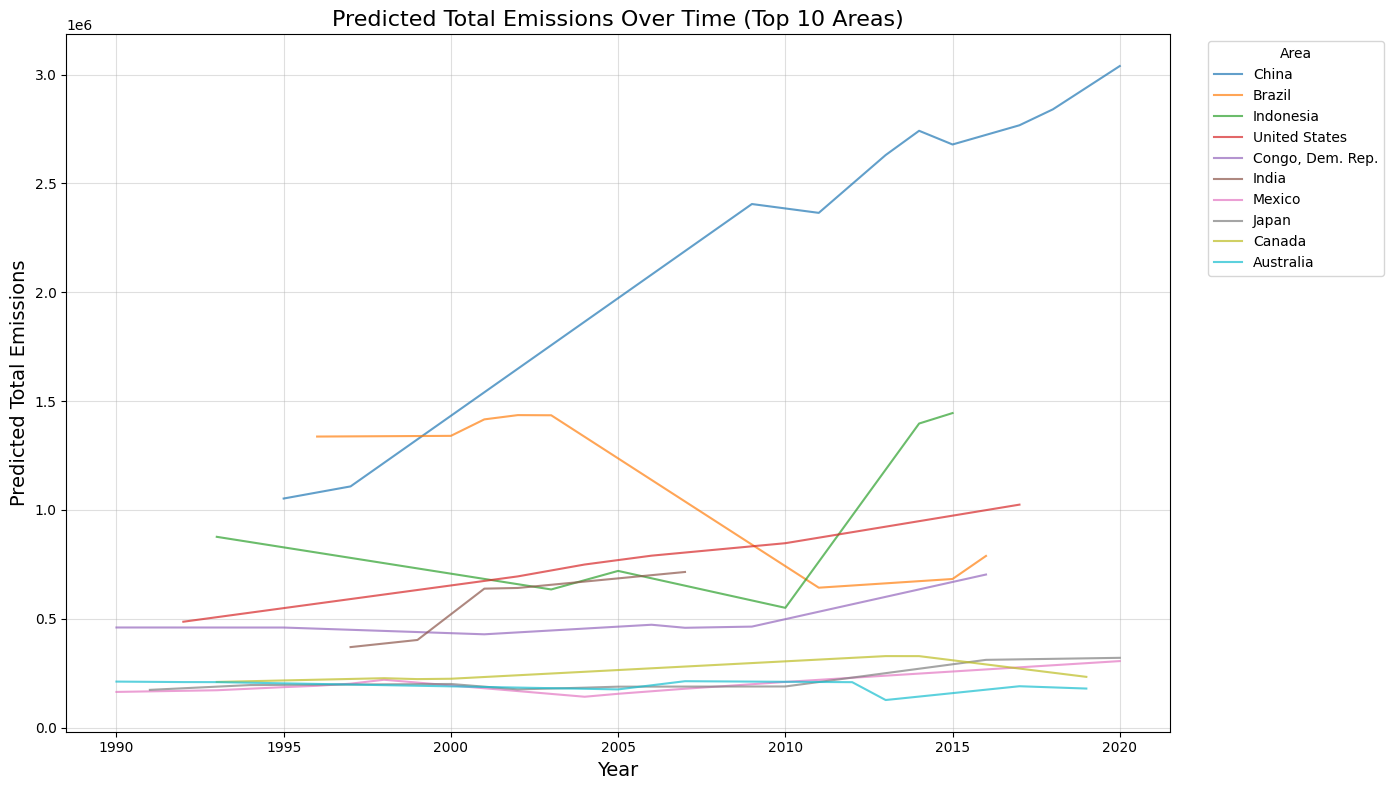

In [68]:
data_with_predictions = agri_gdp_tr.dropna(subset=['predicted_total_emission'])

total_emissions_by_area = (
    data_with_predictions.groupby('Area')['predicted_total_emission']
    .sum()
    .sort_values(ascending=False)
)

# Get the top 10 areas
top_10_areas = total_emissions_by_area.head(10).index

top_10_data = data_with_predictions[data_with_predictions['Area'].isin(top_10_areas)]

top_10_data = top_10_data.sort_values(by=['Area', 'Year'])
plt.figure(figsize=(14, 8))
for area in top_10_areas:
    area_data = top_10_data[top_10_data['Area'] == area]
    plt.plot(
        area_data['Year'],
        area_data['predicted_total_emission'],
        label=area)

plt.title("Predicted Total Emissions Over Time (Top 10 Areas)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Predicted Total Emissions", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10, title="Area")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

